In [1]:
import numpy as np
import gym
from collections import defaultdict
import sys
import json 
from plot_utils import plot_policy, plot_win_rate

In [2]:
env = gym.make('Blackjack-v0')

In [3]:
# hyperparameters 
num_episodes = 1000000
epsilon = 1
epsilon_min = 0.05
gamma = 1 
alpha = 0.03

In [28]:
def monte_carlo_control(num_episodes, epsilon, epsilon_min, alpha, gamma): 
    
    # defining the Q fucntion 
    Q = defaultdict(lambda: np.zeros(2))
    rewards_all_episodes = []
    
    # generating all of the episodes 
    for episode in range(1, num_episodes + 1): 
        epsilon = max(epsilon_min, epsilon * 0.99999)
        
        if episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(episode, num_episodes), end="")
            sys.stdout.flush()
        
        # extracting states, actions, rewards from generated episodes 
        experience = generate_episode(Q, epsilon)
        states, actions, rewards = zip(*experience)
        rewards = np.array(rewards)
        rewards_all_episodes.append(sum(rewards))
        
        
        # looping over all of the timesteps 
        for i, state in enumerate(states):
            discounts = np.array([gamma ** i for i in range(len(rewards[i: ]))])
            returns = sum(rewards[i: ] * discounts)
            
            # updating the Q_function using the monte carlo constant alpha update rule 
            Q[state][actions[i]] += alpha * (returns - Q[state][actions[i]])
            policy = dict((state, np.argmax(q_value)) for state, q_value in Q.items())
        
    return Q, policy, rewards_all_episodes

In [37]:
def generate_episode(Q, epsilon):
    state = env.reset()
    episode = []
    
    while True: 
        
        # sampling actions using the Epsilon Greedy Policy 
        action = epsilon_greedy_policy(Q, state, epsilon)
        next_state, reward, done, info = env.step(action)
        state = next_state
        episode.append((state, action, reward))
    
        if done == True:
            break
    
    return episode 

In [30]:
def epsilon_greedy_policy(Q, state, epsilon):
    probs = np.zeros(2)
    optimal_action = np.argmax(Q[state])
    sub_optimal_action = np.abs(optimal_action - 1)
    
    probs[optimal_action] = 1 - epsilon + (epsilon / 2)
    probs[sub_optimal_action] = epsilon / 2
    
    # choose an action according to the probabilites 
    action = np.random.choice(np.arange(2), p = probs)
    
    return action 

In [31]:
Q, policy, rewards_all_episodes = monte_carlo_control(num_episodes, epsilon, epsilon_min, alpha, gamma)

Episode 1000000/1000000.

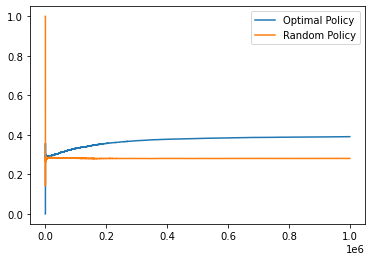

In [35]:
plot_win_rate(rewards_all_episodes, num_episodes)

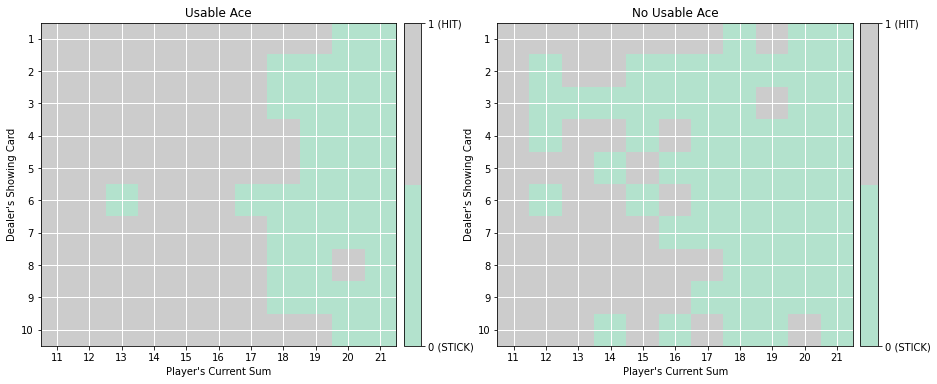

In [36]:
# win_rate of around 42% 
plot_policy(policy)

![True Optimal Policy](misc/optimal.png)
